In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('df_clean.csv')

In [11]:
#perbaiki singkatan
normalized_word = pd.read_csv("kamussingkatan.csv")
kontraksi = normalized_word['singkatan'].to_list()
real_text = normalized_word['asli'].to_list()

regex_format = ["(?:^|\W)" + kata + "(?:$|\W)" for kata in kontraksi]
real_text_space = [" " + kata + " " for kata in real_text]

df['content'] = df['content'].replace(regex_format, real_text_space, regex=True)

In [12]:
import nltk # Stopword
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordsID.csv", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return ''.join([word for word in words if word not in list_stopwords])

df['content'] = df['content'].apply(stopwords_removal) 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


([<matplotlib.patches.Wedge at 0x209be9025f0>,
 [Text(-0.8098238636870058, 1.4375970610025084, 'negatif'),
  Text(0.8098239982845528, -1.4375969851813202, 'positif')],
 [Text(-0.44172210746563945, 0.7841438514559136, '66.3%'),
  Text(0.4417221808824832, -0.7841438100989018, '33.7%')])

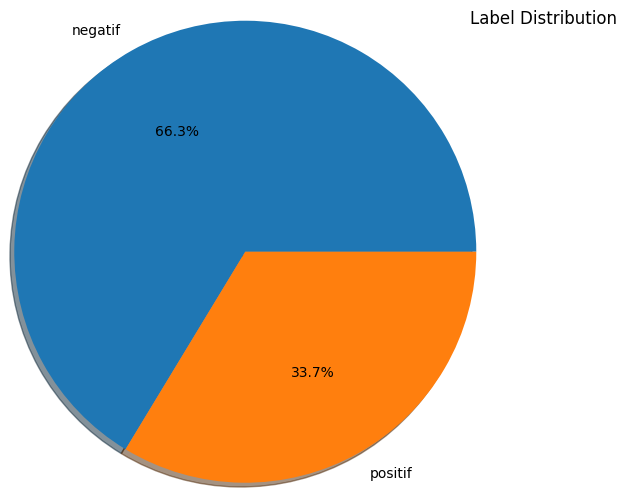

In [13]:
plt.figure(figsize=(15,5))#pie chart
plt.suptitle("Label Distribution")

#plot pie chart
plt.subplot(1,2,1)
label = df['label'].value_counts().index
label_count = df['label'].value_counts().values
plt.pie(data=df, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=1.5)

(-0.5, 399.5, 199.5, -0.5)

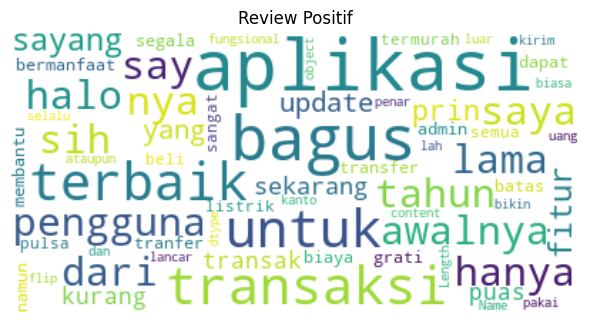

In [14]:
from wordcloud import WordCloud#word cloud postif
%matplotlib inline
plt.figure(figsize=(25, 15))
# Wordcloud with positive tweets
positive_tweets = df['content'][df["label"] == 'positif']
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(positive_tweets))
plt.subplot(1, 3, 1)
plt.title("Review Positif")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

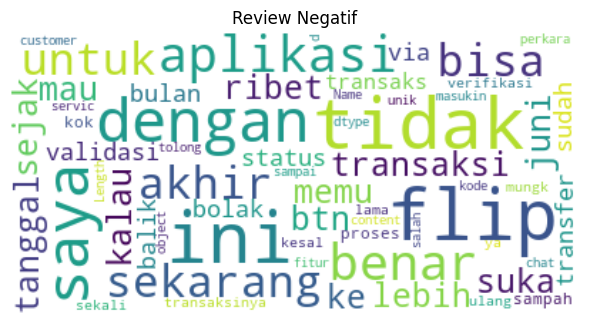

In [15]:
# Wordcloud negatif
plt.figure(figsize=(25, 15))
neutral_tweets = df['content'][df["label"] == 'negatif']
neutral_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(neutral_tweets))
plt.subplot(1, 3, 2)
plt.title("Review Negatif")
plt.imshow(neutral_wordcloud, interpolation="bilinear")
plt.axis("off")

In [16]:
df.to_csv('df_final.csv')